In [311]:
from matplotlib import pyplot as plt
import numpy as np
from time import time

## Метод Рунге-Кутты

In [312]:
# численный метод подсчета интеграла для y` = f(x,y):
def RungeKutta(x_0=None, y_0=None, h=0.1, N=100, f=None):
    x_points = [x_0 + i*h for i in range(N + 1)]
    y_points = []

    y_cur = y_0
    y_points.append(y_0)
    for i in range(N):
        x_cur = x_points[i]
        k1 = f(x_cur, y_cur)
        k2 = f(x_cur + 0.5*h, y_cur + 0.5*h*k1)
        k3 = f(x_cur + 0.5*h, y_cur + 0.5*h*k2)
        k4 = f(x_cur + h, y_cur + h*k3)
        y_upd = y_cur + h / 6.0 * (k1 + 2*(k2 + k3) + k4)
        y_cur = y_upd
        y_points.append(y_upd)

    return x_points, y_points

**1)**  
Чтобы проверить результат работы алгоритма, попробуем численно приблизить решение диф. уравнения : 
$$y' = x + y,$$
$$y(0)=1$$
Аналитически можно вывести решение: 
$$y = 2e^{-x} - x - 1$$
Теперь проверим, насколько наш метод Рунге-Кутты приближает реальные значения в точках. Рассмотрим вариант с шагом $h=0.1$ и количеством итераций равным $N=100$

In [313]:
def draw_plot(x_vals, y_vals, real_vals, title, label):
    fig = plt.figure(figsize=(10,8))
    plt.title(title, fontsize=15)
    plt.xlabel('x', fontsize=15)
    plt.ylabel('y', fontsize=15)
    plt.grid(True)
    plt.plot(x_vals, y_vals, label=label)
    plt.plot(x_vals, real_vals, label='Настоящие значения')
    plt.legend()
    plt.show()

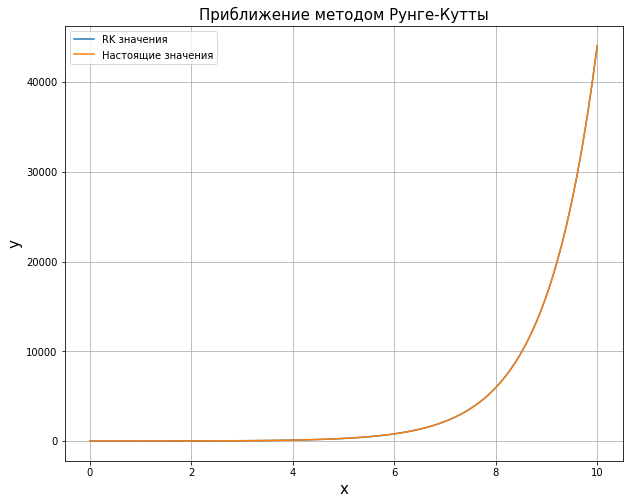

MSE metric: 0.5754460686845274


In [314]:
def f(x, y):
    return x + y

x_vals, y_vals = RungeKutta(0,1,0.1,100,f)
real_vals = [2*np.exp(x) - x - 1 for x in x_vals]

draw_plot(x_vals, y_vals, real_vals, 'Приближение методом Рунге-Кутты', 'RK значения')

print('MSE metric:', ((np.array(y_vals) - np.array(real_vals))**2).sum())

Как мы видим, такой подход отлично приближает реальное решение, прямые абсолютно совпадают на плоскости. К тому же для проверки можно посчитать MSE метрику, которая смотрит квадрат отклонения от реальных значений. Значение MSE=0.575 - это очень мало, что говорит нам о корректности алгоритма.

**2)**

Аналогично проверим алгоритм на диф. уравнении:
$$y' = \frac{1}{cos(x)} - y \cdot tg(x),$$
$$y(0) = 3$$

Аналитическим решением будет являться функция:
$$y = 3 cos(x) + sin(x)$$

Рассмотрим поведение алгоритма при шаге $h=0.001$ и $N=10000$

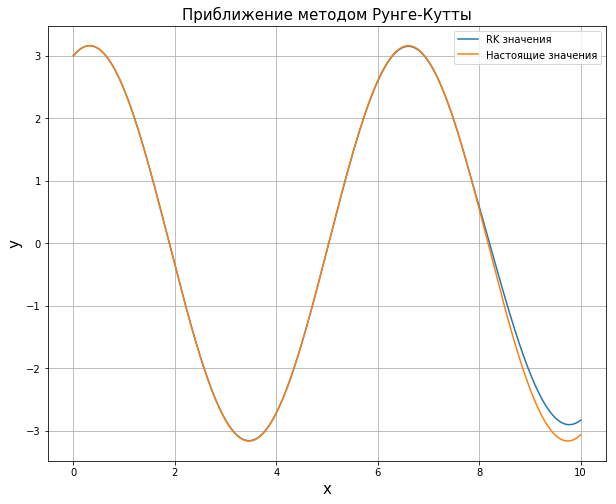

MSE metric: 100.35537056413966


In [315]:
def f(x, y):
    return (1.0/np.cos(x)) - y * np.tan(x) 

x_vals, y_vals = RungeKutta(0,3,0.001,10000,f)
real_vals = [3*np.cos(x) + np.sin(x) for x in x_vals]

draw_plot(x_vals, y_vals, real_vals, 'Приближение методом Рунге-Кутты', 'RK значения')

print('MSE metric:', ((np.array(y_vals) - np.array(real_vals))**2).sum())

В целом алгоритм неплохо приближает реальный ответ, но данного порядка уже не совсем хватает; в конце отрезка мы видим небольшое отклонение, но до этого приближение почти идеальное.

## Метод Адамса

In [316]:
def Adams(x_0=None, y_0=None, h=0.1, N=100, f=None):
    x_points, y_points = RungeKutta(x_0, y_0, h, 3, f) # задает начальные четыре точки
    for i in range(4, N+1):
        prev_val = (55/24)*f(x_points[i-1], y_points[i-1]) - (59/24)*f(x_points[i-2], y_points[i-2]) + (37/24)*f(x_points[i-3], y_points[i-3]) - (3/8)*f(x_points[i-4], y_points[i-4])
        x_cur = x_points[-1]
        x_points.append(x_cur + h)
        y_points.append(y_points[-1] + h * prev_val)
    return x_points, y_points

Аналогичным путем проверим алгоритм Адамса на каждом примере:

**1)**

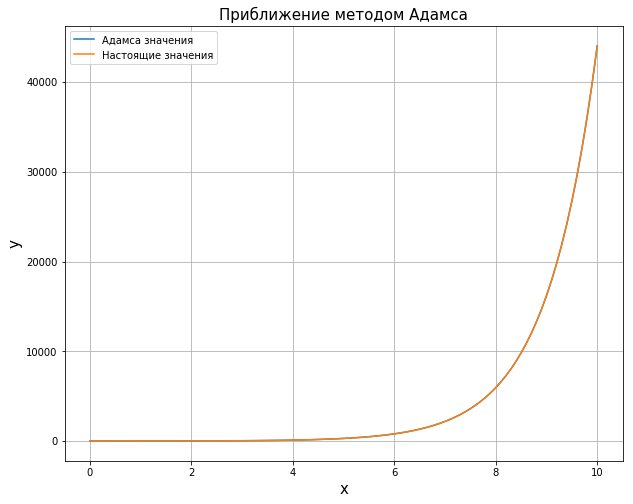

MSE metric: 820.5362773059719


In [317]:
def f(x, y):
    return x + y

x_vals, y_vals = Adams(0,1,0.1,100,f)
real_vals = [2*np.exp(x) - x - 1 for x in x_vals]

draw_plot(x_vals, y_vals, real_vals, 'Приближение методом Адамса', 'Адамса значения')

print('MSE metric:', ((np.array(y_vals) - np.array(real_vals))**2).sum())

На этом примере, на графике не видно отличий, но метрика показывает, что приближение стало похуже, чем в методе Рунге-Кутты.

**2)**

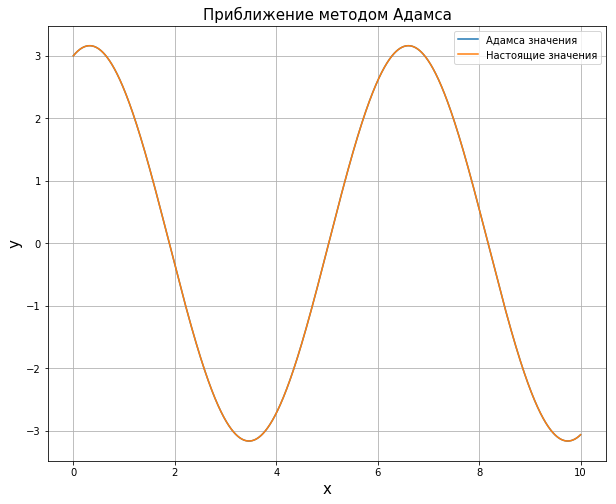

MSE metric: 9.079309074007752e-18


In [318]:
def f(x, y):
    return (1.0/np.cos(x)) - y * np.tan(x) 

x_vals, y_vals = Adams(0 , 3, 0.001,10000,f)
real_vals = [3*np.cos(x) + np.sin(x) for x in x_vals]

draw_plot(x_vals, y_vals, real_vals, 'Приближение методом Адамса', 'Адамса значения')

print('MSE metric:', ((np.array(y_vals) - np.array(real_vals))**2).sum())

Наоборот, на втором примере, алгоритм Адамса великолепно отработал - приближение идеальное! Это и показывает метрика - она около нуля.

**Вывод:** из наших примеров можно сделать вывод, что для разных задач лучше могут подходить разные численные методы, приближающие ответ (при фиксированных параметрах!). Если же мы хотим улучшить ответ, то можно поэксперементировать с длинной шага и количеством итераций в алгоритме.

### Сравнение времени работы алгоритмов

In [319]:
def f(x, y):
    return x + y

h = 0.1
n_vals = [10**i for i in range(8)]

adams_time = []
rk_time = []
for N in n_vals:
    start_time = time()
    Adams(0 , 0, h, N, f)
    adams_time.append(time() - start_time)
    start_time = time()
    RungeKutta(0 , 0, h, N, f)
    rk_time.append(time() - start_time)

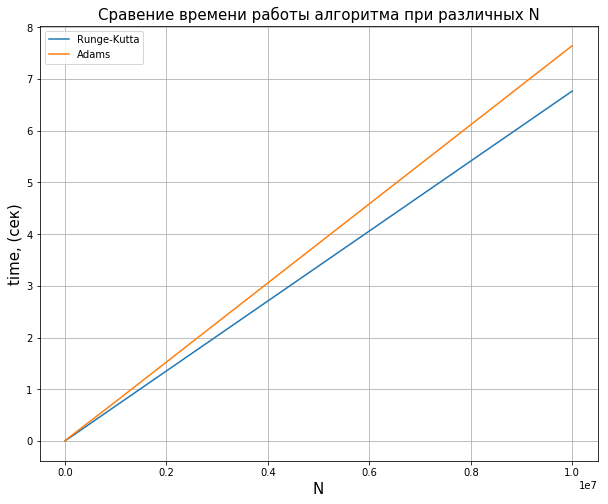

In [320]:
fig = plt.figure(figsize=(10,8))
plt.title('Сравение времени работы алгоритма при различных N', fontsize=15)
plt.xlabel('N', fontsize=15)
plt.ylabel('time, (cек)', fontsize=15)
plt.grid(True)
plt.plot(n_vals, rk_time, label='Runge-Kutta')
plt.plot(n_vals, adams_time, label='Adams')
plt.legend()
plt.show()

Как мы видим, чуть более быстро вычисляемым алгоритмом является алгоритм Рунге-Кутты, время его работы при различных N меньше. При N = $10^7$ разница времени вычислений достигается равной ~1 сек.

### Устойчивость Рунге-Кутты

Нам нужно проверить, алгоритм Рунге-Кутты на устойчивость. Стандартный способ проверки алгоритма на устойчивость заключается в применении алгоритма интегрирования к контрольному линейному уравнению первого порядка. Алгоритм будет проявлять признаки устойчивости, если при начальном приближении мы будем брать точку не точно на траектории, а например около нее, в окрестности. В этом случае нужно будет показать, что ошибка не будет сильно накапливаться, и что последующие значения в точках будут хорошо апроксимироваться.

В качестве контрольного уравнения возьмем наше первое уравнение $y' = y + x$, $y(0) = 1$. Рассмотрим тот случай, когда начальное значение не лежит точно на прямой в начале, то есть когда точка лежит в некоторой окрестности реального значения. Для того, чтобы показать устойчивость проанализируем метрику при сдвигах. В качетсве сдвига возьмем грубое приближение от 0.001 до 0.01

In [321]:
def f(x, y):
    return y + x

x_0 = 0
y_0 = 1

x_vals, y_vals = RungeKutta(x_0 + 0.01, y_0 + 0.01, 0.001, 1000, f)
shift = [k * 1e-3 for k in range(10)]
real_vals = [2*np.exp(x) - x - 1 for x in x_vals]

for x_ in shift:
    for y_ in shift:
        x_vals, y_vals = RungeKutta(x_0 + x_, y_0 + y_, 0.001, 1000, f)
        print('MSE, ' + 'shift_x=' +  str(x_) + ', shift_y=' + str(y_))  
        print(((np.array(y_vals) - np.array(real_vals))**2).sum())

MSE, shift_x=0.0, shift_y=0.0
0.7009510857914192
MSE, shift_x=0.0, shift_y=0.001
0.609961803437996
MSE, shift_x=0.0, shift_y=0.002
0.5253699683691707
MSE, shift_x=0.0, shift_y=0.003
0.4471755805849207
MSE, shift_x=0.0, shift_y=0.004
0.3753786400856334
MSE, shift_x=0.0, shift_y=0.005
0.30997914687114914
MSE, shift_x=0.0, shift_y=0.006
0.25097710094086134
MSE, shift_x=0.0, shift_y=0.007
0.19837250229569287
MSE, shift_x=0.0, shift_y=0.008
0.15216535093524772
MSE, shift_x=0.0, shift_y=0.009000000000000001
0.11235564685947981
MSE, shift_x=0.001, shift_y=0.0
0.6566533435713022
MSE, shift_x=0.001, shift_y=0.001
0.5686212262774091
MSE, shift_x=0.001, shift_y=0.002
0.4869865562679845
MSE, shift_x=0.001, shift_y=0.003
0.41174933354360777
MSE, shift_x=0.001, shift_y=0.004
0.34290955810399004
MSE, shift_x=0.001, shift_y=0.005
0.280467229948562
MSE, shift_x=0.001, shift_y=0.006
0.22442234907826564
MSE, shift_x=0.001, shift_y=0.007
0.17477491549271554
MSE, shift_x=0.001, shift_y=0.008
0.131524929191

Как можно увидеть, при неточном начальном приближении метрика все равно показывает отличный результат, то есть это показывает, что метод Рунге-Кутты устойчив к неточным начальным приближениям. Метод Рунге-Кутты не дает ошибки разрастись и сделать приближение неточным. Чтобы убедиться в этом построим график при сдвиге 0.01 по каждой из координат.

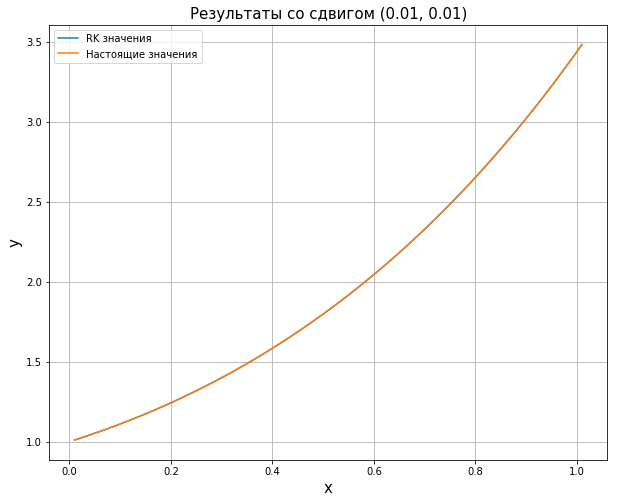

In [322]:
x_vals, y_vals = RungeKutta(x_0 + 0.01, y_0 + 0.01, 0.001, 1000, f)
draw_plot(x_vals, y_vals, real_vals, 'Результаты со сдвигом (0.01, 0.01)','RK значения')

Как мы видим на первых 1000 итерациях с шагом 0.001, алгоритм все же подстраивается под истинные значения и не отклоняется. Это еще раз свидетельствует об устойчивости.